In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
db = pd.read_csv('studentadmission.csv');
db.iloc(1)

In [28]:
# Encoding the admitted (target variabel)

# Yes ---> 0
# No ----> 1

label = []
j = 0
for i in db['admitted']:
    print(i)
    
    if i == 'yes':
        label.append(1)
    else:
        label.append(0)
        
    j = j + 1
    
db['label'] = label    

yes
yes
yes
yes
no
no
yes
no
no
no


In [36]:
en_db = db[['score', 'label']]

In [101]:
db
# en_db

,score,admitted,label
0,63,yes,1
1,65,yes,1
2,70,yes,1
3,71,yes,1
4,53,no,0
5,12,no,0
6,54,yes,1
7,52,no,0
8,25,no,0
9,31,no,0


In [112]:
# # en_db.columns = ["", ""]

# x_data = en_db.iloc[:,:1]

# labels = en_db.iloc[:,1:2]

# labels

# en_db.columns = ["", ""]

x_data = db.score.to_numpy()

labels = db.label.to_numpy()

x_data = x_data.reshape(-1, 1)

x_data

# type(x_data)

array([[63],
       [65],
       [70],
       [71],
       [53],
       [12],
       [54],
       [52],
       [25],
       [31]], dtype=int64)

In [134]:
x_train, x_test, y_train, y_test = train_test_split(x_data, labels, test_size = 0.2
                                                    , random_state = 0)

In [135]:
model = LogisticRegression(solver = "liblinear", random_state = 0)

H = model.fit(x_train, y_train)

In [136]:
print("Logistic Regression Model Intercept (m): ", model.intercept_)

print("Logistic Regression Model Coefficient (c): ", model.coef_)

Logistic Regression Model Intercept (m):  [-0.75245462]
Logistic Regression Model Coefficient (c):  [[0.02283997]]


In [137]:
y_predict = model.predict(x_test)
print(y_predict)

[1 0]


In [147]:
for i in y_predict:
    
    if i == 1:
        print("Yes")
    else:
       print("No")

Yes
No


Text(0.5, 1.0, 'Logistic Regression Model')

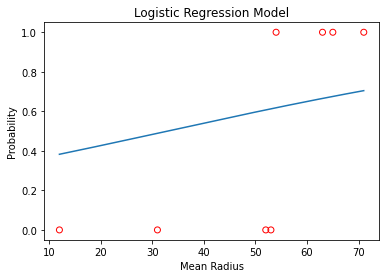

In [139]:
# Scatter plot for Logistic Regression Model

colors = {0:'red', 1:'blue'}
def sigmoid(x):
    return (1 / (1 +np.exp(-(model.intercept_[0] +(model.coef_[0][0] * x)))))
x1 = np.arange(np.min(x_train), np.max(x_train), 0.01)
y1 = [sigmoid(n) for n in x1]
plt.scatter(x_train,y_train,facecolors='none',edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x_train:colors[x_train]),cmap=colors)
plt.plot(x1,y1)
plt.xlabel("Mean Radius")
plt.ylabel("Probability")
plt.title('Logistic Regression Model')

In [128]:
x_train

array([[54],
       [52],
       [71],
       [63],
       [12]], dtype=int64)

In [140]:
# Evaluate the Model

print("\nPrediction Probability : \n",model.predict_proba(x_test))

print("\nPrediction : ",model.predict(x_test))

print("\nScore : ",model.score(x_test, y_test))


Prediction Probability : 
 [[0.30020044 0.69979956]
 [0.54523976 0.45476024]]

Prediction :  [1 0]

Score :  1.0


In [142]:
# Print Confusion Matrix

print("\nConfusion Matrix : \n",confusion_matrix(y_test, model.predict(x_test)))


Confusion Matrix : 
 [[1 0]
 [0 1]]


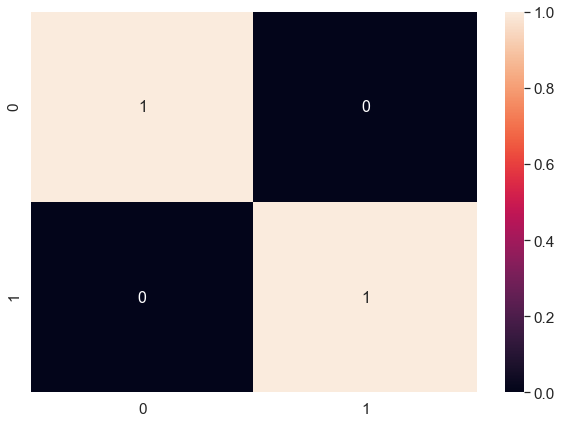

In [144]:
# Plot Confusion Matrix 

cm = confusion_matrix(y_test, model.predict(x_test))

import seaborn as sn
import pandas as pd

df_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()


In [146]:
# Print Classification Report

print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

